In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

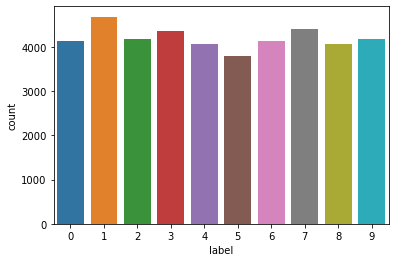

In [9]:
sns.countplot(x= train_df['label'])
plt.show()

#### As we can see from graph that all label have almost balanced dataset

### Splitting the data into x_train and y_train

In [10]:
y_train = train_df['label']
train_df.pop('label')
x_train = train_df

### Reshaping and scaling x_train and y_train

In [11]:
#here we are reshaping all the pixels value to 28*28 
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = test_df.values.reshape(-1, 28, 28, 1)

In [12]:
x_train = x_train / 255
x_test = x_test / 255

* Normalize and reshape to make it work better with keras. because the values range from 0-255, making them range from 0-1 will make it easier for our model to run. So simply diving the values by 255 should do the trick.

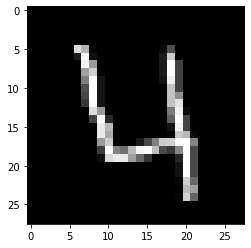

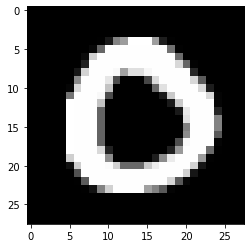

In [13]:
plt.imshow(x_train[3], cmap= 'gray')
plt.show()
# The number should look like 4

plt.imshow(x_train[4], cmap= 'gray')
plt.show()
# The number should look like 0

In [14]:
x_train.shape

(42000, 28, 28, 1)

In [15]:
y_train.shape

(42000,)

# Model Building

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import callbacks

## The model used here is sequential.
* The method involves a relatively small number of parameters and hence training is relatively easy and fast.
* The system not only produces a classification of the digit but also a rich description of the instantiation parameters which can yield information such as the writing style.
* unlike many other recognition schemes, it does not rely on some form of pre-normalization of input images, but can handle arbitrary scalings, translations and a limited degree of image rotation.

In [17]:
model=Sequential([
    Conv2D(32, kernel_size=(5,5) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation ='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation ='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='softmax')
])


* Conv2D creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
* Activation function used here is ReLU activation function. it is used because ReLU is far more faster to compute. iT giveS you the power to build and train more deeper network with it.
* Max-pooling helps in extracting low-level features like edges, points, etc.

In [18]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

* Adam Optimiser shapes your model into its most accurate form.
* The loss function is the guide to tell the optimiser whether it is moving right or wrong direction.
* Accuracy is proportional to true results among total no. of cases examined.

In [21]:
model.fit(x_train, y_train, epochs=30, batch_size=64, callbacks=[callback])

Epoch 1/30
657/657 [==============================] - 31s 47ms/step - loss: 0.4401 - accuracy: 0.86030s - loss: 0.4460 
Epoch 2/30
657/657 [==============================] - 31s 48ms/step - loss: 0.1232 - accuracy: 0.9642 - ETA: 1s -
Epoch 3/30
657/657 [==============================] - 31s 48ms/step - loss: 0.0904 - accuracy: 0.9728
Epoch 4/30
657/657 [==============================] - 31s 47ms/step - loss: 0.0733 - accuracy: 0.9775
Epoch 5/30
657/657 [==============================] - 30s 46ms/step - loss: 0.0614 - accuracy: 0.9810
Epoch 6/30
657/657 [==============================] - 32s 48ms/step - loss: 0.0562 - accuracy: 0.9821
Epoch 7/30
657/657 [==============================] - 31s 47ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 8/30
657/657 [==============================] - 31s 47ms/step - loss: 0.0448 - accuracy: 0.9856
Epoch 9/30
657/657 [==============================] - 31s 48ms/step - loss: 0.0406 - accuracy: 0.9870
Epoch 10/30
657/657 [==============================]

# Model Predictions

In [22]:
y_test = model.predict(x_test)

In [24]:
y_predict = np.argmax(y_test, axis = 1)
y_predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [27]:
index_list = [ ]
for i in list(test_df.index):
    index_list.append(i+1)

In [29]:
submission = pd.DataFrame({
    'Image_Id' : index_list,
    'Label'    :  y_predict
})

In [30]:
submission

,Image_Id,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [31]:
submission.to_csv('submission.csv', index = False)